# Main usage examples

In [11]:
import serial
import serial.tools.list_ports
import time
import pyrotlib
import json
import numpy as np
import matplotlib.pyplot as plt


ports = list(serial.tools.list_ports.comports())
for port, desc, hwid in sorted(ports):
        print("{}: {} [{}]".format(port, desc, hwid))

com = "COM22"


COM3: Intel(R) Active Management Technology - SOL (COM3) [PCI\VEN_8086&DEV_51E3&SUBSYS_22F417AA&REV_01\3&11583659&0&B3]
COM22: Serielles USB-Gerät (COM22) [USB VID:PID=2341:0069 SER=3318132F59313835BB3033324B572E41]


In [8]:
ax = pyrotlib.AxisName.AZ
with pyrotlib.RotationTable(com, verbose=False) as rot:
        print("connected.")

        print(rot.test())
        axstat = rot.getAxisStatus(ax)
        print(axstat)

        print(rot.test())
        rot.steps(ax, -35)
        rot.referenceAxis(ax)
        axstat = rot.getAxisStatus(ax)

        print(f"Reference Position: {axstat.ReferencePosition} ")
        rot.steps(ax, -35)
        rot.referenceAxis(ax)
        axstat = rot.getAxisStatus(ax)
        print(f"Reference Position: {axstat.ReferencePosition} ")
        
        rot.referenceAxis(ax)
        axstat = rot.getAxisStatus(ax)
        print(f"Reference Position: {axstat.ReferencePosition} ")
        
        print("Done")

connected.
True
Axis(StepPin=2, DirectionPin=5, HallPin=19, ReferenceOffset=-3.8, TotalSteps=1600, MaxDPhiDt=20, IsInit=False, Position=0, LastStepTime=0, IsReferenced=False, ReferencePosition=0)
True
Reference Position: 814 
Reference Position: 813 
Reference Position: 814 
Done


In [5]:
Tread = 60
with pyrotlib.RotationTable(com, verbose=False) as rot:
        
        print("connected.")

        start = time.time()

        while (time.time()-start < Tread):
            az, el = rot.readHall(pyrotlib.AxisName.AZ), rot.readHall(pyrotlib.AxisName.EL)
            print(f"AZ: {az}, EL: {el}")
            time.sleep(.2)

connected.
AZ: 511.01, EL: 175.32
AZ: 510.99, EL: 175.28
AZ: 511.03, EL: 175.26
AZ: 511.02, EL: 175.18
AZ: 510.97, EL: 175.32
AZ: 510.99, EL: 175.38
AZ: 510.98, EL: 175.3
AZ: 511.02, EL: 175.35
AZ: 511.03, EL: 175.27
AZ: 511.04, EL: 175.36
AZ: 511.0, EL: 175.33
AZ: 510.98, EL: 175.4
AZ: 510.97, EL: 467.65
AZ: 511.03, EL: 537.61
AZ: 510.96, EL: 534.03
AZ: 510.99, EL: 534.0
AZ: 511.02, EL: 534.0
AZ: 511.02, EL: 534.0
AZ: 511.0, EL: 534.0
AZ: 510.96, EL: 559.06
AZ: 510.98, EL: 501.01
AZ: 511.01, EL: 501.0
AZ: 511.04, EL: 501.0
AZ: 510.99, EL: 501.0
AZ: 510.96, EL: 501.0
AZ: 511.01, EL: 501.0
AZ: 510.99, EL: 501.0
AZ: 510.97, EL: 501.0
AZ: 511.03, EL: 501.0
AZ: 511.01, EL: 501.0
AZ: 510.95, EL: 501.0
AZ: 511.02, EL: 501.0
AZ: 511.01, EL: 501.0
AZ: 510.99, EL: 501.0
AZ: 511.04, EL: 501.0


#### Calibrate both axis

In [24]:
import time
start = time.time()
with pyrotlib.RotationTable(com, verbose=True) as rot:
    print("connected")

    start = time.time()
    rot.referenceAxis(pyrotlib.AxisName.AZ)
    stat_az = rot.getAxisStatus(pyrotlib.AxisName.AZ)

    print("AZ clibration done")
    rot.referenceAxis(pyrotlib.AxisName.EL)

    stat_el = rot.getAxisStatus(pyrotlib.AxisName.EL)

    print(f"Reference Position AZ: {stat_az.ReferencePosition} EL: {stat_el.ReferencePosition}")

    
print("Total runtime ", time.time()-start)

< 'OK\r\n'
connected
> b'steps AZ 35 True\n'
< 'OK\r\n'
> b'reference AZ\n'
< 'Pos: -34 B: 514.159607 dB/dphi: -2.550456 \r\n'
< 'Pos: -33 B: 515.053711 dB/dphi: 3.973796 \r\n'
< 'Pos: -32 B: 515.375854 dB/dphi: 1.431749 \r\n'
< 'Pos: -31 B: 514.961304 dB/dphi: -1.842448 \r\n'
< 'Pos: -30 B: 515.625854 dB/dphi: 2.953559 \r\n'
< 'Pos: -29 B: 514.867310 dB/dphi: -3.371311 \r\n'
< 'Pos: -28 B: 515.718628 dB/dphi: 3.783637 \r\n'
< 'Pos: -27 B: 516.094421 dB/dphi: 1.670193 \r\n'
< 'Pos: -26 B: 517.386475 dB/dphi: 5.742459 \r\n'
< 'Pos: -25 B: 516.919312 dB/dphi: -2.076280 \r\n'
< 'Pos: -24 B: 516.924683 dB/dphi: 0.023872 \r\n'
< 'Pos: -23 B: 516.840881 dB/dphi: -0.372450 \r\n'
< 'Pos: -22 B: 516.353638 dB/dphi: -2.165527 \r\n'
< 'Pos: -21 B: 517.246521 dB/dphi: 3.968370 \r\n'
< 'Pos: -20 B: 517.870972 dB/dphi: 2.775336 \r\n'
< 'Pos: -19 B: 517.792419 dB/dphi: -0.349121 \r\n'
< 'Pos: -18 B: 518.255493 dB/dphi: 2.058106 \r\n'
< 'Pos: -17 B: 517.914734 dB/dphi: -1.514486 \r\n'
< 'Pos: -16 B: 5

In [25]:
import numpy as np
import matplotlib.pyplot as plt

ax = pyrotlib.AxisName.EL
with pyrotlib.RotationTable(com, verbose=True) as rot:
    print("connected")

    start = time.time()
    rot.referenceAxis(pyrotlib.AxisName.EL)

    stat_el = rot.getAxisStatus(pyrotlib.AxisName.EL)

    rot.steps(ax, -50)

    Nsteps = 80
    res = np.zeros((Nsteps, 2))
    for i in range(Nsteps):
        stat_el = rot.getAxisStatus(pyrotlib.AxisName.EL)
        res[i] = [stat_el.Position, rot.readHall(ax, 10)]
        print(f"\r{i}/{Nsteps}", end="")
        rot.steps(ax,1)

    print("moving to reference position")
    rot.moveTo(ax, stat_el.ReferencePosition)
    
    stat_el = rot.getAxisStatus(ax)
    print(stat_el.ReferencePosition, stat_el.Position)

< 'OK\r\n'
connected
> b'steps EL 35 True\n'
< 'OK\r\n'
> b'reference EL\n'
< 'Pos: -34 B: 406.393585 dB/dphi: -45.963135 \r\n'
< 'Pos: -33 B: 391.915405 dB/dphi: -64.347466 \r\n'
< 'Pos: -32 B: 374.213684 dB/dphi: -78.674316 \r\n'
< 'Pos: -31 B: 355.047913 dB/dphi: -85.181206 \r\n'
< 'Pos: -30 B: 335.055786 dB/dphi: -88.853897 \r\n'
< 'Pos: -29 B: 312.895294 dB/dphi: -98.491081 \r\n'
< 'Pos: -28 B: 290.851776 dB/dphi: -97.971191 \r\n'
< 'Pos: -27 B: 264.515930 dB/dphi: -117.048210 \r\n'
< 'Pos: -26 B: 236.097748 dB/dphi: -126.303040 \r\n'
< 'Pos: -25 B: 209.605667 dB/dphi: -117.742584 \r\n'
< 'Pos: -24 B: 176.494232 dB/dphi: -147.161942 \r\n'
< 'Pos: -23 B: 146.203049 dB/dphi: -134.627487 \r\n'
< 'Pos: -22 B: 118.428925 dB/dphi: -123.440552 \r\n'
< 'Pos: -21 B: 87.812195 dB/dphi: -136.074356 \r\n'
< 'Pos: -20 B: 55.676987 dB/dphi: -142.823151 \r\n'
< 'Pos: -19 B: 17.567051 dB/dphi: -169.377502 \r\n'
< 'Pos: -18 B: 1.061994 dB/dphi: -73.355804 \r\n'
< 'Pos: -17 B: 1.012992 dB/dphi: -0.

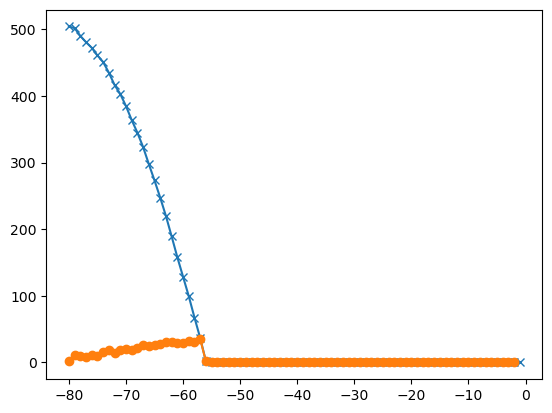

In [5]:
fig, ax = plt.subplots()

ax.plot(res[:,0], res[:,1], marker='x')
ax.plot(res[:-1,0], res[:-1,1]-res[1:,1], marker='o')
#print("Total runtime ", time.time()-start)

faster

< 'OK\r\n'
connected
> b'steps EL 35 True\n'
< 'OK\r\n'
> b'reference EL\n'
< 'start referencing\r\n'
< 'Pos: -34 Val_mean: 573.51 dB/dphi 0.09\r\n'
< 'Pos: -33 Val_mean: 570.13 dB/dphi -3.38\r\n'
< 'Pos: -32 Val_mean: 569.23 dB/dphi -0.90\r\n'
< 'Pos: -31 Val_mean: 567.16 dB/dphi -2.07\r\n'
< 'Pos: -30 Val_mean: 565.56 dB/dphi -1.60\r\n'
< 'Pos: -29 Val_mean: 563.47 dB/dphi -2.09\r\n'
< 'Pos: -28 Val_mean: 561.73 dB/dphi -1.74\r\n'
< 'Pos: -27 Val_mean: 559.45 dB/dphi -2.28\r\n'
< 'Pos: -26 Val_mean: 555.50 dB/dphi -3.95\r\n'
< 'Pos: -25 Val_mean: 552.60 dB/dphi -2.90\r\n'
< 'Pos: -24 Val_mean: 548.52 dB/dphi -4.08\r\n'
< 'Pos: -23 Val_mean: 545.67 dB/dphi -2.84\r\n'
< 'Pos: -22 Val_mean: 539.87 dB/dphi -5.81\r\n'
< 'Pos: -21 Val_mean: 533.81 dB/dphi -6.06\r\n'
< 'Pos: -20 Val_mean: 528.52 dB/dphi -5.29\r\n'
< 'Pos: -19 Val_mean: 522.88 dB/dphi -5.63\r\n'
< 'Pos: -18 Val_mean: 512.99 dB/dphi -9.89\r\n'
< 'Pos: -17 Val_mean: 505.43 dB/dphi -7.56\r\n'
< 'Pos: -16 Val_mean: 496.83 dB/dph

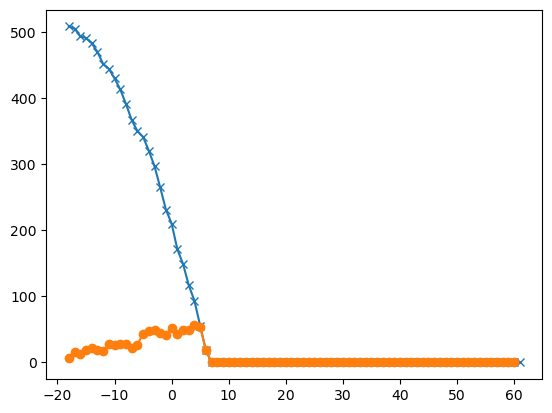

In [10]:

ax = pyrotlib.AxisName.EL
with pyrotlib.RotationTable(com, verbose=True) as rot:
    print("connected")

    start = time.time()
    rot.referenceAxis(pyrotlib.AxisName.EL)

    stat_el = rot.getAxisStatus(pyrotlib.AxisName.EL)

    rot.steps(ax, -50)

    Nsteps = 80
    res2 = np.zeros((Nsteps, 2))
    for i in range(Nsteps):
        stat_el = rot.getAxisStatus(pyrotlib.AxisName.EL)
        res2[i] = [stat_el.Position, rot.readHall(ax, 10)]
        print(f"\r{i}/{Nsteps}", end="")
        rot.steps(ax,1)

    print("moving to reference position")
    rot.moveTo(ax, stat_el.ReferencePosition)
    
    stat_el = rot.getAxisStatus(ax)
    print(stat_el.ReferencePosition, stat_el.Position)

fig, ax = plt.subplots()

ax.plot(res2[:,0], res2[:,1], marker='x')
ax.plot(res2[:-1,0], res2[:-1,1]-res[1:,1], marker='o')
#print("Total runtime ", time.time()-start)

## Check calibration quality random

In [32]:
Niter = 20

res = np.zeros((Niter, 2))
with pyrotlib.RotationTable(com, verbose=True) as rot:
    print("connected")

    start = time.time()
    rot.referenceAxis(pyrotlib.AxisName.AZ)
    stat_az = rot.getAxisStatus(pyrotlib.AxisName.AZ)

    print("AZ clibration done")
    rot.referenceAxis(pyrotlib.AxisName.EL)

    stat_el = rot.getAxisStatus(pyrotlib.AxisName.EL)

    print(f"Reference Position AZ: {stat_az.ReferencePosition} EL: {stat_el.ReferencePosition}")


    stat_az, stat_el = rot.getAxisStatus(pyrotlib.AxisName.AZ), rot.getAxisStatus(pyrotlib.AxisName.EL)
    for i in range(Niter):
        # go to random pos on each axis

        StepAZ, StepEL = np.random.uniform(0, stat_az.TotalSteps), np.random.uniform(0, stat_el.TotalSteps)

        rot.moveTo(pyrotlib.AxisName.AZ, stat_az.Position + int(StepAZ))
        rot.moveTo(pyrotlib.AxisName.EL, stat_el.Position + int(StepEL))

        
        rot.moveTo(pyrotlib.AxisName.AZ, stat_az.ReferencePosition)
        rot.moveTo(pyrotlib.AxisName.EL, stat_el.ReferencePosition)

        rot.referenceAxis(pyrotlib.AxisName.AZ)
        rot.referenceAxis(pyrotlib.AxisName.EL)
        
        stat_az, stat_el = rot.getAxisStatus(pyrotlib.AxisName.AZ), rot.getAxisStatus(pyrotlib.AxisName.EL)

        res[i] = [stat_az.ReferencePosition, stat_el.ReferencePosition]

        print(f"{i}/{Niter}")

    
print("Total runtime ", time.time()-start)

< 'OK\r\n'
connected
> b'steps AZ 35 True\n'
< 'OK\r\n'
> b'reference AZ\n'
< 'Pos: -34 B: 310.756927 dB/dphi: -21.853571 \r\n'
< 'Pos: -33 B: 292.609039 dB/dphi: -80.657280 \r\n'
< 'Pos: -32 B: 265.156036 dB/dphi: -122.013351 \r\n'
< 'Pos: -31 B: 242.186752 dB/dphi: -102.085709 \r\n'
< 'Pos: -30 B: 228.824020 dB/dphi: -59.389923 \r\n'
< 'Pos: -29 B: 214.540817 dB/dphi: -63.480904 \r\n'
< 'Pos: -28 B: 191.969193 dB/dphi: -100.318336 \r\n'
< 'Pos: -27 B: 160.667847 dB/dphi: -139.117096 \r\n'
< 'Pos: -26 B: 131.524017 dB/dphi: -129.528137 \r\n'
< 'Pos: -25 B: 109.008041 dB/dphi: -100.071007 \r\n'
< 'Pos: -24 B: 87.285072 dB/dphi: -96.546532 \r\n'
< 'Pos: -23 B: 63.284943 dB/dphi: -106.667244 \r\n'
< 'Pos: -22 B: 39.040043 dB/dphi: -107.755112 \r\n'
< 'Pos: -21 B: 17.691954 dB/dphi: -94.880402 \r\n'
< 'Pos: -20 B: 2.520011 dB/dphi: -67.430855 \r\n'
< 'Pos: -19 B: 1.803990 dB/dphi: -3.182313 \r\n'
< 'Pos: -18 B: 1.701991 dB/dphi: -0.453330 \r\n'
< 'Pos: -17 B: 1.751991 dB/dphi: 0.222221 \r

In [33]:
res

array([[4., 2.],
       [4., 2.],
       [4., 2.],
       [4., 2.],
       [4., 2.],
       [4., 2.],
       [4., 2.],
       [4., 2.],
       [4., 2.],
       [4., 2.],
       [4., 2.],
       [4., 2.],
       [4., 2.],
       [4., 1.],
       [4., 2.],
       [4., 2.],
       [4., 2.],
       [4., 2.],
       [4., 2.],
       [4., 2.]])